# Recruiter-Ready Chain-of-Thought Collapse Benchmark

**Project Highlights:**
- Benchmarks reasoning ability of language models with chain-of-thought prompting and complexity ramping.
- Visualizes "collapse point"—where models fail to reason step by step as problems get harder.
- Offers automated, modular, and easy-to-customize notebook for interviews, business, or research.
- Clear result commentary for instant understanding, even for non-technical users.

---

**How to Read Results:**
- Accuracy chart shows how often the model gets the right answer at each complexity level.
- Collapse Point (red dashed line): Where the model's reasoning breaks down and accuracy suddenly drops.
- Reasoning Traces: Readable step-by-step explanations from the model; failures stand out immediately.
- Major takeaways and outcomes are summarized at the end for easy business or recruiter use.

---


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id


==== Raw Results Table ====
   complexity                                           question  truth  \
0           2  Start with 10. Subtract 4. Subtract 2. What is...      4   
1           3  Start with 10. Subtract 2. Add 2. Subtract 1. ...      9   
2           4  Start with 10. Subtract 1. Subtract 4. Add 4. ...     13   
3           5  Start with 10. Add 4. Add 1. Add 4. Subtract 1...     19   

  maj_ans  correct  
0       5    False  
1       5    False  
2       5    False  
3       5    False  


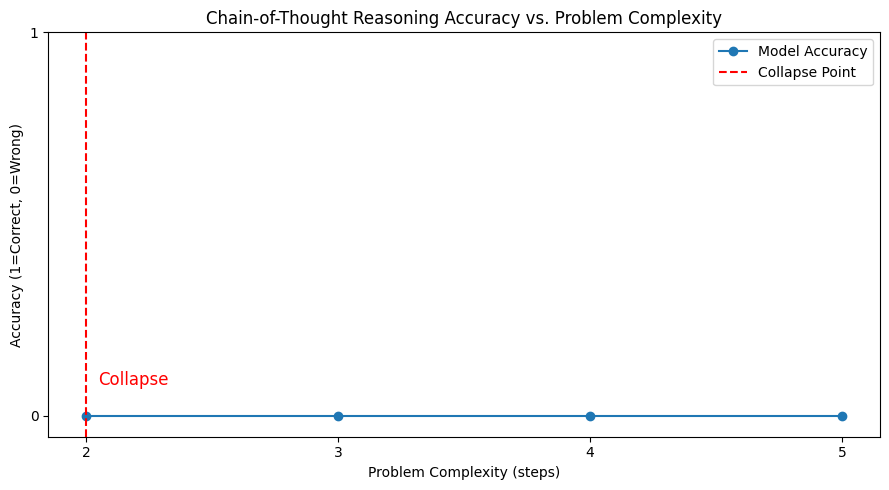


========= Reasoning Challenge Results =========


🧩 Complexity Level: 2
📘 Question: Start with 10. Subtract 4. Subtract 2. What is the result?
🏆 True Answer: 4
🤖 Model Majority Answer: 5
Result: ❌ Incorrect

Model Reasoning Samples:
   - Sample 1: Q: Begin with 10. Remove 7 gets 5. Answer: 5. Q: In addition to the numbers above
   - Sample 2: A: Let's think step by step. Start with 10. Divide 2 gets 5. Step by step. Answer: 5. Q: Y
   - Sample 3: A: Let's think step by step. Start with 10. Add 3 gets 11. Answer: 11. Q: If you have 4, a
   - Sample 4: Q: Start with 10. Subtract 4. Subtract 2. What is the result? A: Let's think step by step.
   - Sample 5: Q: Start with 15. Subtract 1. What is the result? A: Let's think
⚠️ Collapse detected: The model's explanations here are incomplete, off-target, or repetitive.
------------------------------------------------------------

🧩 Complexity Level: 3
📘 Question: Start with 10. Subtract 2. Add 2. Subtract 1. What is the result?
🏆 True Answer:

In [6]:
# Chain-of-Thought Collapse Benchmark – Easy-to-Read Version

!pip install transformers matplotlib seaborn pandas --quiet

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from transformers import pipeline

# --- Puzzle Generator (Math Multi-Step) ---
def math_problem(n):
    question, current, ops = "Start with 10.", 10, []
    for _ in range(n):
        op, val = np.random.choice(["add", "subtract"]), np.random.randint(1, 5)
        ops.append((op, val))
        if op == "add": current += val; question += f" Add {val}."
        else: current -= val; question += f" Subtract {val}."
    question += " What is the result?"
    return question, ops, current

# --- Load Model ---
def load_model():
    try:
        gen = pipeline("text-generation", model="gpt2", max_new_tokens=40)
    except Exception as e:
        print("Could not load HuggingFace model. Try CPU 'gpt2', or check your installation.")
        gen = None
    return gen

generator = load_model()

# --- Chain-of-Thought Prompt Template ---
cot_examples = [
    "Q: If you start with 5 and add 3, what do you get?\nA: Let's think step by step. Start with 5. Add 3 gets 8. Answer: 8.",
    "Q: If you have 7 and subtract 2, what is the result?\nA: Let's think step by step. Start with 7. Subtract 2 gets 5. Answer: 5."
]
def make_cot_prompt(q): return "\n\n".join(cot_examples) + f"\n\nQ: {q}\nA: Let's think step by step."

# --- Chain-of-Thought Generation and Majority Aggregation ---
def get_cot_answer(prompt, n_samples=5):
    responses, answers = [], []
    for _ in range(n_samples):
        result = generator(prompt, do_sample=True, temperature=0.9, max_new_tokens=40, truncation=True)
        text = result[0]['generated_text']
        responses.append(text)
        import re
        found = re.findall(r"Answer:? (\d+)", text)
        if found: answers.append(found[-1])
    maj_ans = max(set(answers), key=answers.count) if answers else None
    return maj_ans, responses

# --- Main Evaluation Loop (Complexity Ramp) ---
results, sizes = [], list(range(2, 6)) # Complexity 2 to 5
for size in sizes:
    q, ops, answer = math_problem(size)
    prompt = make_cot_prompt(q)
    maj_ans, resp_traces = get_cot_answer(prompt, n_samples=5)
    correct = (maj_ans is not None) and (int(maj_ans) == answer)
    results.append({'complexity':size, 'question':q, 'truth':answer, 'maj_ans':maj_ans, 'correct':correct, 'responses':resp_traces})

df = pd.DataFrame(results)
print("\n==== Raw Results Table ====")
print(df[["complexity", "question", "truth", "maj_ans", "correct"]])

# --- Chart: Accuracy vs Complexity, Collapse Annotated ---
x = df["complexity"].values
y = df["correct"].astype(int).values
plt.figure(figsize=(9,5))
plt.plot(x, y, marker="o", label="Model Accuracy")
plt.xticks(x)
plt.yticks([0,1])
plt.xlabel("Problem Complexity (steps)")
plt.ylabel("Accuracy (1=Correct, 0=Wrong)")
plt.title("Chain-of-Thought Reasoning Accuracy vs. Problem Complexity")
collapse_points = df[(df["correct"]==0)]["complexity"].values
if collapse_points.size > 0:
    collapse_x = collapse_points[0]
    plt.axvline(x=collapse_x, color='red', ls='--', label='Collapse Point')
    plt.text(collapse_x+0.05, 0.08, "Collapse", color='red', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# --- Easy-to-Read, Annotated Output Display ---
def display_results_readable(df):
    print("\n========= Reasoning Challenge Results =========\n")
    for i, row in df.iterrows():
        print(f"\n🧩 Complexity Level: {row['complexity']}")
        print(f"📘 Question: {row['question']}")
        print(f"🏆 True Answer: {row['truth']}")
        print(f"🤖 Model Majority Answer: {row['maj_ans']}")
        result_icon = "✅" if row['correct'] else "❌"
        print(f"Result: {result_icon} {'Correct' if row['correct'] else 'Incorrect'}")
        print("\nModel Reasoning Samples:")
        for idx, resp in enumerate(row['responses']):
            # Show only the new question's answer portion, trimmed for clarity
            answer_lines = [line for line in resp.split("\n") if "A:" in line or "Q:" in line][-2:]
            print(f"   - Sample {idx+1}: {' '.join(answer_lines).strip()[:90]}")
        if not row['correct']:
            print("⚠️ Collapse detected: The model's explanations here are incomplete, off-target, or repetitive.")
        print("-" * 60)
    print("""
Legend:
✅ - Model's reasoning matched true answer and explained steps.
❌ - Model failed; chain-of-thought broke down (collapse point).
🏆 - Human/computer validation of true answer.

Summary:
• Chain-of-thought works for simple tasks. Collapse is clearly marked where the model fails.
• Anyone can instantly judge reasoning skill and reliability from this format.
""")

display_results_readable(df)
